In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import re
import string
import warnings
warnings.filterwarnings('ignore')
import librosa
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
import tensorflow as tf
from sklearn.metrics import classification_report



import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, roc_curve, accuracy_score, plot_confusion_matrix

import missingno as msno
from matplotlib import pyplot as plt

import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,LayerNormalization,BatchNormalization,Dropout,Conv1D,MaxPooling1D,GlobalMaxPooling1D,GlobalAveragePooling1D,Activation,Input,concatenate,Reshape



from tensorflow.keras import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv1D, MaxPool1D, Dropout, Flatten
from tensorflow.keras.losses import sparse_categorical_crossentropy, categorical_crossentropy
import tensorflow as tf


from scipy import interpolate
import librosa

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_addons as tfa

from tensorflow.keras.preprocessing.text import Tokenizer

import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf

import imp
from nltk.util import ngrams
from gensim.models import Word2Vec
import multiprocessing
from time import time  # To time our operations

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,Permute

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from datasets import load_dataset

In [2]:
emotions = load_dataset('emotion')

emotions.set_format('pandas')
df = emotions['train'][:]
df.head()

def label_int2str(row):
    return emotions['train'].features['label'].int2str(row)

df['label_name'] = df['label'].apply(label_int2str)
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [3]:
text_list_p=df["text"].tolist()
labels_p=df["label_name"].tolist()

text_list=[]
labels=[]
for i in range(len(labels_p)):
    if text_list_p[i]!='':
        text_list.append(text_list_p[i])
        labels.append(labels_p[i])

labels=np.array(labels)

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(labels)
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
num_classes=int(np.max(integer_encoded)+1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
mapping = dict(zip(label_encoder.classes_, onehot_encoder.transform(label_encoder.transform(label_encoder.classes_).reshape(num_classes, 1))))
for key,value in mapping.items():
    print("",key," ----------------------------- ",value)



# randomly create indices for train and test
indices = np.arange(len(text_list))
np.random.shuffle(indices)
splitter=0.6
train_indices = indices[:int(splitter*len(text_list))]
test_indices = indices[int(splitter*len(text_list)):]
text_list_train = np.array(text_list)[train_indices]
text_list_test = np.array(text_list)[test_indices]
labels_train = np.array(labels)[train_indices]
labels_test = np.array(labels)[test_indices]
onehot_encoded_train = np.array(onehot_encoded)[train_indices]
onehot_encoded_test = np.array(onehot_encoded)[test_indices]
integer_encoded_train = np.array(integer_encoded)[train_indices]
integer_encoded_test = np.array(integer_encoded)[test_indices]




# doing for text_list_train
omega_text_words_train = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list_train)):
    sentence=text_list_train[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words_train.append(flat_list)


# doing for text_list_test
omega_text_words_test = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list_test)):
    sentence=text_list_test[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words_test.append(flat_list)


# doing for text_list
omega_text_words = []
n=1
cores = multiprocessing.cpu_count() # Count the number of cores in a computer
for i in range(len(text_list)):
    sentence=text_list[i]
    unigrams = ngrams(sentence.split(), n)
    flat_list = [item for sublist in [list(a) for a in unigrams] for item in sublist]
    omega_text_words.append(flat_list)

 anger  -----------------------------  [1. 0. 0. 0. 0. 0.]
 fear  -----------------------------  [0. 1. 0. 0. 0. 0.]
 joy  -----------------------------  [0. 0. 1. 0. 0. 0.]
 love  -----------------------------  [0. 0. 0. 1. 0. 0.]
 sadness  -----------------------------  [0. 0. 0. 0. 1. 0.]
 surprise  -----------------------------  [0. 0. 0. 0. 0. 1.]


In [4]:
t = time()
w2v_model=Word2Vec(sentences=omega_text_words,vector_size=50,window=4,min_count=1,workers=cores-1,epochs=60,sg=1) #sh=1->Skip-gram,0->CBOW

print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

#As we do not plan to train the model any further, we are calling init_sims(), which will make the model much more memory-efficient:
w2v_model.init_sims(replace=True)

Time to train the model: 0.17 mins


ref_embedding_train.shape:  (9600, 64, 50)
ref_embedding_test.shape:  (6400, 66, 50)


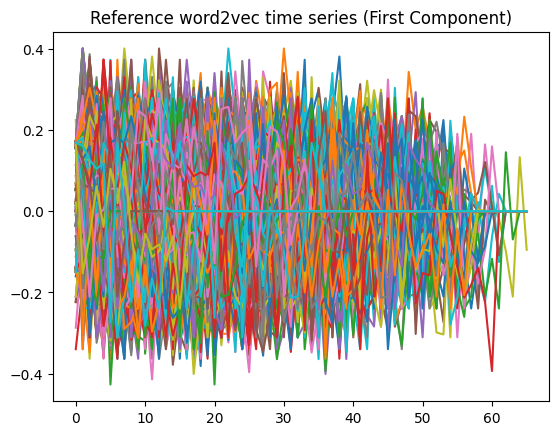

In [5]:
# getting word2vec embedding for train
ref_embedding_train=np.zeros((len(integer_encoded_train),max([len(i) for i in omega_text_words_train]),50))
for i in range(ref_embedding_train.shape[0]):
    sent=omega_text_words_train[i]
    for j in range(len(sent)):
        ref_embedding_train[i,j,:]=w2v_model.wv[omega_text_words_train[i][j]]


# getting word2vec embedding for test
ref_embedding_test=np.zeros((len(integer_encoded_test),max([len(i) for i in omega_text_words_test]),50))
for i in range(ref_embedding_test.shape[0]):
    sent=omega_text_words_test[i]
    for j in range(len(sent)):
        ref_embedding_test[i,j,:]=w2v_model.wv[omega_text_words_test[i][j]]


print("ref_embedding_train.shape: ",ref_embedding_train.shape)
print("ref_embedding_test.shape: ",ref_embedding_test.shape)


plt.figure()
for i in range(len(ref_embedding_test)):
    plt.plot(ref_embedding_test[i,:,0])
    plt.title("Reference word2vec time series (First Component)")     

In [6]:
# pad ref_embedding_test to 252 with 0.0
if ref_embedding_train.shape[1]<ref_embedding_test.shape[1]:
    ref_embedding_train=ref_embedding_train[:,:ref_embedding_test.shape[1],:]
    ref_embedding_train_pad=np.zeros((ref_embedding_train.shape[0],ref_embedding_test.shape[1],ref_embedding_test.shape[2]))
    ref_embedding_train_pad[:ref_embedding_train.shape[0],:ref_embedding_train.shape[1],:ref_embedding_train.shape[2]]=ref_embedding_train
    ref_embedding_train=ref_embedding_train_pad

if ref_embedding_train.shape[1]>ref_embedding_test.shape[1]:
    ref_embedding_test_pad=np.zeros((ref_embedding_test.shape[0],ref_embedding_train.shape[1],ref_embedding_test.shape[2]))
    ref_embedding_test_pad[:ref_embedding_test.shape[0],:ref_embedding_test.shape[1],:ref_embedding_test.shape[2]]=ref_embedding_test
    ref_embedding_test=ref_embedding_test_pad

In [7]:
max_size=ref_embedding_train.shape[1]
very_red_size=ref_embedding_train.shape[2]

In [11]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = layers.LayerNormalization(epsilon=1e-6)(inputs)
    x = layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(x, x)
    x = layers.Dropout(dropout)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.LayerNormalization(epsilon=1e-6)(res)
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(x)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    return x + res


# define keras model
def create_model():
    inputs = layers.Input(shape=(max_size,very_red_size))
    num_heads = 3
    head_size = max_size // num_heads
    ff_dim = 32
    num_transformer_blocks = 3
    dropout = 0.2

    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D()(x)
    # x = layers.Dropout(dropout)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(20, activation="relu")(x)
    x = layers.BatchNormalization()(x)
    # x = layers.Dropout(dropout)(x)
    outputs = layers.Dense(num_classes, activation="softmax")(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    model.compile(
        optimizer=keras.optimizers.Adam(lr=1e-3),
        loss="categorical_crossentropy",
        metrics=["accuracy"],
    )
    return model


model = create_model()
model.summary()
model.fit(ref_embedding_train,onehot_encoded_train, epochs=20, verbose=2,validation_data=(ref_embedding_test,onehot_encoded_test))


Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 66, 50)]     0           []                               
                                                                                                  
 layer_normalization_6 (LayerNo  (None, 66, 50)      100         ['input_2[0][0]']                
 rmalization)                                                                                     
                                                                                                  
 multi_head_attention_3 (MultiH  (None, 66, 50)      13448       ['layer_normalization_6[0][0]',  
 eadAttention)                                                    'layer_normalization_6[0][0]']  
                                                                                            

200/200 [==============================] - 1s 5ms/step


<Axes: >

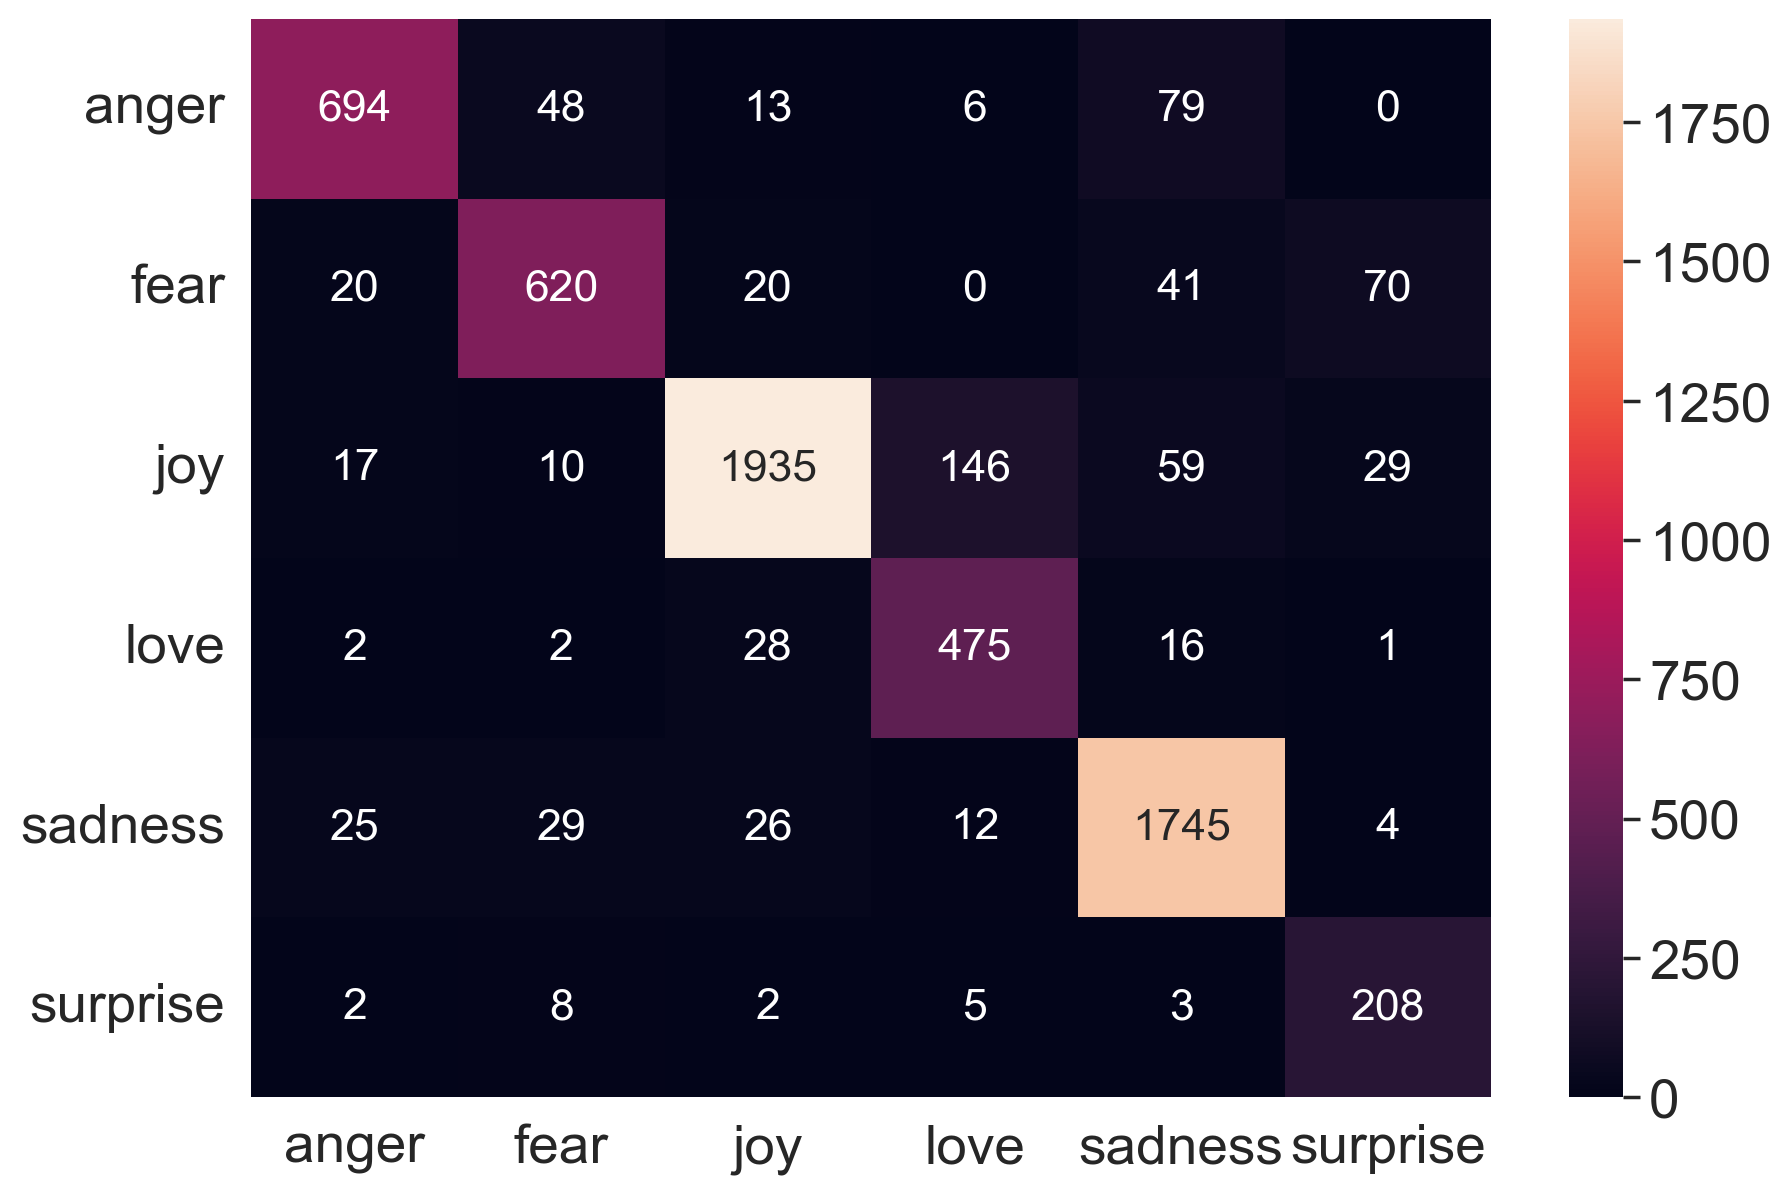

In [12]:
ref=np.argmax(onehot_encoded_test,axis=1)
predictions=np.argmax(model.predict(ref_embedding_test),axis=1)
cm=confusion_matrix(ref,predictions)


label_names=[]
for key,_ in mapping.items():
    label_names.append(key)

    
#plot confusion matrix

df_cm = pd.DataFrame(cm, label_names,label_names)
plt.figure(figsize = (10,7),dpi=200)
sn.set(font_scale=1.8)  # Increase the font size for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16},fmt='d') # font size

In [13]:
print(classification_report(ref, predictions,digits=4))

              precision    recall  f1-score   support

           0     0.9132    0.8262    0.8675       840
           1     0.8647    0.8042    0.8333       771
           2     0.9560    0.8811    0.9171      2196
           3     0.7376    0.9065    0.8134       524
           4     0.8981    0.9479    0.9223      1841
           5     0.6667    0.9123    0.7704       228

    accuracy                         0.8870      6400
   macro avg     0.8394    0.8797    0.8540      6400
weighted avg     0.8945    0.8870    0.8883      6400

